In [1]:
import numpy as np
import pandas as pd
from pycaret.classification import *

In [2]:
df1 = pd.read_csv("training.csv")
df2 = pd.read_csv("testing.csv")
dftrain,dftest = df1,df2

In [3]:
clf1 = setup(data = dftrain, target = 'Attrition',use_gpu=True,test_data=dftest)

,Description,Value
0,session_id,4516
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1177, 27)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
top10 = compare_models(n_select = 10,sort='F1',cross_validation=False,exclude = ['lightgbm','ridge','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6689,0.8129,0.8511,0.3077,0.4520,0.2830,0.3584,0.0000
lr,Logistic Regression,0.8635,0.8119,0.3191,0.6522,0.4286,0.3612,0.3911,0.1400
lda,Linear Discriminant Analysis,0.8328,0.8123,0.3617,0.4722,0.4096,0.3142,0.3180,0.0400
ada,Ada Boost Classifier,0.8396,0.7861,0.2979,0.5000,0.3733,0.2881,0.3008,0.1200
xgboost,Extreme Gradient Boosting,0.8464,0.7459,0.2553,0.5455,0.3478,0.2735,0.2989,112.9500
catboost,CatBoost Classifier,0.8703,0.7983,0.2128,0.9091,0.3448,0.3024,0.4029,1.7900
et,Extra Trees Classifier,0.8601,0.8088,0.1702,0.8000,0.2807,0.2378,0.3276,0.2100
dt,Decision Tree Classifier,0.7440,0.5636,0.2979,0.2500,0.2718,0.1180,0.1187,0.0200
gbc,Gradient Boosting Classifier,0.8396,0.8005,0.1702,0.5000,0.2540,0.1878,0.2224,0.3700
knn,K Neighbors Classifier,0.8259,0.5917,0.1277,0.3750,0.1905,0.1187,0.1405,0.0100


In [5]:
tuned_top10 = [(tune_model(i, optimize = 'F1')) for i in top10]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7627,0.5263,0.1579,0.2000,0.1765,0.0401,0.0405
1,0.7458,0.4402,0.1053,0.1333,0.1176,-0.0285,-0.0287
2,0.7627,0.5037,0.1579,0.2000,0.1765,0.0401,0.0405
3,0.7542,0.5646,0.1579,0.1875,0.1714,0.0284,0.0285
4,0.7627,0.6871,0.4737,0.3333,0.3913,0.2494,0.2554
5,0.6356,0.5157,0.2632,0.1471,0.1887,-0.0226,-0.0242
6,0.6525,0.4965,0.2632,0.1562,0.1961,-0.0075,-0.0079
7,0.6581,0.4350,0.1579,0.1111,0.1304,-0.0744,-0.0762
8,0.7094,0.5000,0.1579,0.1429,0.1500,-0.0247,-0.0248
9,0.8376,0.5379,0.1053,0.5000,0.1739,0.1245,0.1722


In [6]:
# blender = blend_models(estimator_list=top10, method='soft')
stacker = stack_models(estimator_list = top10[1:], meta_model = top10[0])
pred = predict_model(stacker)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6610,0.7576,0.7368,0.2857,0.4118,0.2340,0.2859
1,0.7797,0.7743,0.4737,0.3600,0.4091,0.2768,0.2807
2,0.8136,0.8713,0.8421,0.4571,0.5926,0.4851,0.5232
3,0.7288,0.6956,0.5789,0.3143,0.4074,0.2511,0.2708
4,0.6780,0.7783,0.7368,0.2979,0.4242,0.2529,0.3029
5,0.6949,0.7028,0.6842,0.3023,0.4194,0.2524,0.2911
6,0.7203,0.7964,0.7895,0.3409,0.4762,0.3242,0.3774
7,0.7350,0.7846,0.7368,0.3500,0.4746,0.3262,0.3666
8,0.7009,0.7589,0.7895,0.3261,0.4615,0.3008,0.3573
9,0.7692,0.7970,0.5789,0.3667,0.4490,0.3122,0.3252


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.7816,0.8217,0.7660,0.4045,0.5294,0.4044,0.4393


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


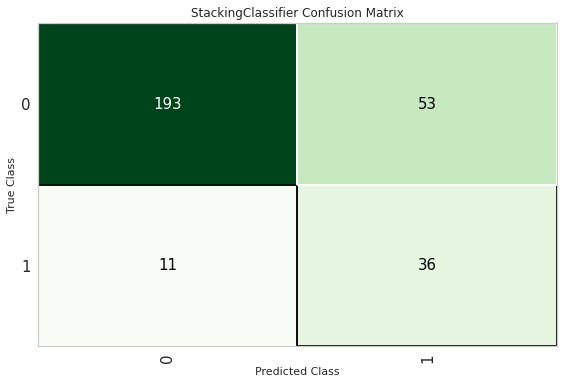

In [16]:
plot_model(stacker, plot='confusion_matrix')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


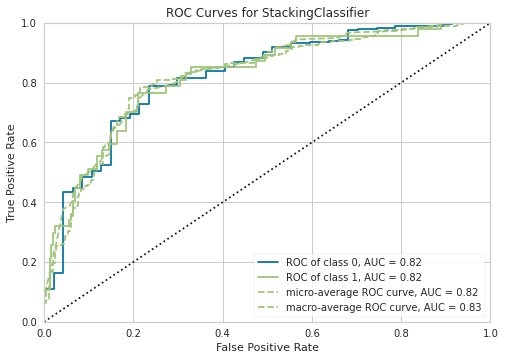

In [7]:
# AUC 
plot_model(stacker, plot = 'auc')

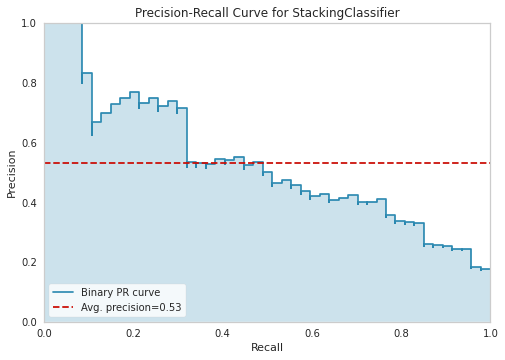

In [8]:
# PR
plot_model(stacker, plot = 'pr')

In [12]:
blender = blend_models(estimator_list=top10, method='soft')
pred = predict_model(blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8390,0.7661,0.4211,0.5000,0.4571,0.3634,0.3653
1,0.8136,0.7905,0.0526,0.2000,0.0833,0.0174,0.0223
2,0.8814,0.8846,0.2632,1.0000,0.4167,0.3747,0.4802
3,0.8475,0.7023,0.2105,0.5714,0.3077,0.2420,0.2804
4,0.8475,0.7889,0.2632,0.5556,0.3571,0.2829,0.3085
5,0.8220,0.7554,0.2632,0.4167,0.3226,0.2261,0.2340
6,0.8644,0.7826,0.3158,0.6667,0.4286,0.3626,0.3953
7,0.8632,0.7911,0.4211,0.6154,0.5000,0.4240,0.4343
8,0.8718,0.7884,0.3684,0.7000,0.4828,0.4175,0.4456
9,0.8547,0.7691,0.1579,0.7500,0.2609,0.2166,0.2998


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8635,0.8202,0.2553,0.7059,0.3750,0.3168,0.3689


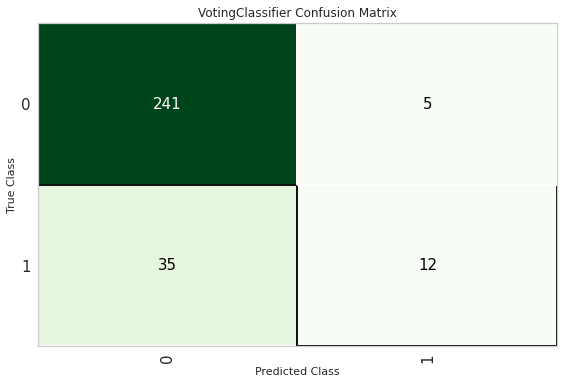

In [17]:
plot_model(blender, plot='confusion_matrix')

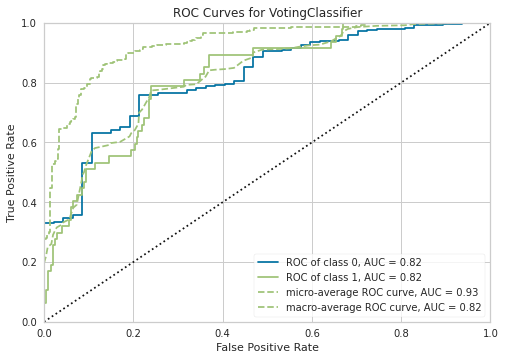

In [13]:
# AUC 
plot_model(blender, plot = 'auc')

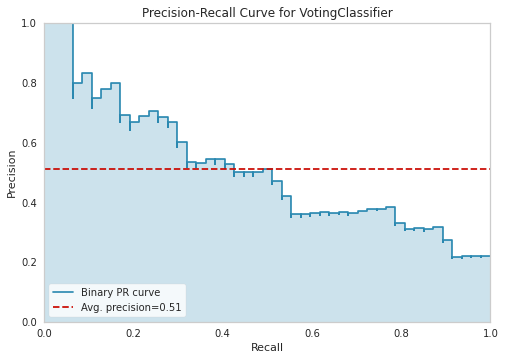

In [14]:
# PR
plot_model(blender, plot = 'pr')